**[Running Random Simulations in NumPy](https://livebook.manning.com/book/data-science-bookcamp/chapter-3/v-5/1)**

> datasbook03 <> sharklasers.com 123456

This section covers:
- Basic usage of the NumPy library.
- Simulating random observation using NumPy.
- Visualizing simulated data.
- Estimating unknown probabilities from simulated observations.



NumPy, which stands for Numerical Python, is the engine that powers Pythonic data science. Python, despite its many virtues, is simply not suited for large-scale numeric analysis. Hence, data scientists must rely on the external NumPy library to efficiently manipulate and store numeric data. NumPy is an incredibly powerful tool for processing large collections of raw numbers. Thus, many of Python’s external data-processing libraries are NumPy-compatible. One such library is Matplotlib, which we introduced in the previous section. Other NumPy-driven libraries will be discussed in later portions of the book. This section focuses on randomized numerical simulations. We will leverage NumPy to analyze billions of random data-points. These random observations will allow us to learn hidden probabilities.

# 3.1 Simulating Random Coin-Flips and Dice-Rolls Using NumPy

Install `numpy` library:
```
pip install numpy
```


In [331]:
import numpy as np
import matplotlib.pyplot as plt

In [332]:
dice_roll = np.random.randint(1, 7)
assert 1 <= dice_roll <= 6

Conveniently, consistency can easily be maintained by calling `np.random.seed(0)`. The method-call makes sequences of randomly chosen values reproducible. After the call, we can directly guarantee that our first three dice-rolls will land on values 5, 6, and 1.

In [333]:
np.random.seed(0)
dice_rolls = [np.random.randint(1, 7) for _ in range(3)]
assert dice_rolls == [5, 6, 1]

We’ll now use `np.random.randint(0, 2)` to simulate a single flip of an unbiased coin.The method-call returns a random value equal either to 0 or 1. Within the simulation, we’ll assume that 0 stands for tails, and 1 stands for heads.


In [334]:
np.random.randint(0, 2)

1

In [335]:
np.random.seed(0)
coin_flip = np.random.randint(0, 2)
print(f"Coin landed on {'heads' if coin_flip == 1 else 'tails'}")

Coin landed on tails


Next, we’ll simulate a sequence of 10 coin-flips, and then compute the observed frequency of heads.

Simulating 10 fair coin-flips:

In [336]:
np.random.seed(0)


def frequency_heads(coin_flip_sequence):
    total_heads = sum(coin_flip_sequence)
    return total_heads / len(coin_flip_sequence)


coin_flips = [np.random.randint(0, 2) for _ in range(10)]
freq_heads = frequency_heads(coin_flips)
print(f"Frequency of Heads is {freq_heads}")

Frequency of Heads is 0.8


Let's see what happens when we flip the coin 1000 times. After each flip, we will record the total frequency of heads observed in the sequence. Once the coin-flips are completed, we will visualize our output by plotting coin-flip count vs frequency count. Our plot will also include a horizontal line along the actual probability of .5. We’ll generate that line by calling `plt.axhline(.5, color='k')`.

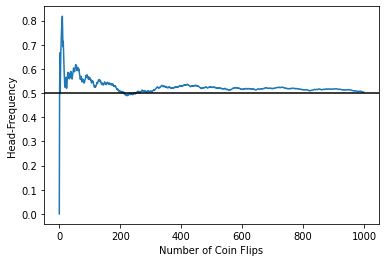

In [337]:
np.random.seed(0)
coin_flips = []
frequencies = []
for _ in range(1000):
    coin_flips.append(np.random.randint(0, 2))
    frequencies.append(frequency_heads(coin_flips))

plt.plot(list(range(1000)), frequencies)
plt.axhline(0.5, color="k")
plt.xlabel("Number of Coin Flips")
plt.ylabel("Head-Frequency")
plt.show()

The probability of heads slowly converges to 0.5. Thus, the Law of Large Numbers appears to hold up.

## 3.1.1  Analyzing Biased Coin-Flips

We’ve simulated a sequence of unbiased coin-flips, but what if we wish to simulate a coin that falls on heads 70% of the time? Well, we can generate that biased output by calling `np.random.binomial(1, .7)`. The binomial method name refers to the generic coin-flip distribution, which mathematicians call the **Binomial distribution**. The method takes as input 2 parameters; the number of coin-flips, and the probability of the desired coin-flip outcome. The method executes the specified number of biased coin-flips. It then counts the instances when the desired outcome was observed. When the number of coin-flips is set to one, the method will return a binary of value of 0 or 1. In our case, a value of 1 represents our desired observation of heads.

In [338]:
np.random.seed(0)
print("Let's flip the biased coin once.")
coin_flip = np.random.binomial(1, 0.7)
print(f"Biased coin landed on {'heads' if coin_flip == 1 else 'tails'}.")

print("\nLet's flip the biased coin 10 times.")
number_coin_flips = 10
head_count = np.random.binomial(number_coin_flips, 0.7)
print(
    (f"{head_count} heads were observed out of {number_coin_flips} biased coin flips")
)

Let's flip the biased coin once.
Biased coin landed on heads.

Let's flip the biased coin 10 times.
6 heads were observed out of 10 biased coin flips


Let's generate a sequence of 1000 biased coin-flips. We’ll then check if the frequency converges to 0.7.

In [339]:
np.random.seed(0)
head_count = np.random.binomial(1000, 0.7)
frequency = head_count / 1000
print(f"Frequency of Heads is {frequency}")

Frequency of Heads is 0.697


The frequency of heads approximates 0.7, but is not actually equal to 0.7. In fact, the frequency-value is 0.003 units smaller than the true probability of heads. Suppose we re-compute the frequency of 1000 coin-flips five more times. Will all the frequencies be lower than 0.7? Will certain frequencies hit the exact value of 0.7? We’ll find out by executing `np.random.binomial(1000, .7)` over 5 looped iterations.

In [340]:
np.random.seed(0)
assert np.random.binomial(1000, .7) / 1000 == 0.697

In [341]:
for i in range(1, 6):
    head_count = np.random.binomial(1000, 0.7)
    frequency = head_count / 1000
    print(f"Frequency at iteration {i} is {frequency}")
    if frequency==0.7:
        print("Frequency equals the probability!\n")

Frequency at iteration 1 is 0.69
Frequency at iteration 2 is 0.7
Frequency equals the probability!

Frequency at iteration 3 is 0.707
Frequency at iteration 4 is 0.702
Frequency at iteration 5 is 0.699


Just one out the 5 iterations produced a measurement that equaled the real probability. Twice the measured frequency was slightly too low, and twice it was slightly too high. The observed frequency appears to fluctuate over every sampling of 1000 coin-flips. It seems that even though the Law of Large Numbers allows us to approximate the actual probability, some uncertainty still remains. Data science is somewhat messy, and we cannot always be certain of the conclusions we draw from our data. Nevertheless, our uncertainty can be measured and contained using what mathematicians call a confidence interval.

# 3.2  Computing Confidence Intervals Using Histograms and NumPy Arrays

Suppose we’re handed a biased coin whose bias we don’t know. We flip the coin 1000 times and observe a measured frequency of 0.709. We know the measured frequency approximates the actual probability, but by how much? More precisely, how confident are we that the actual probability falls within an interval of 0.691 to 0.709? Or that it falls between 0.609 and 0.709? Or between 0.4 and 0.8? Or between 0.0 and 1.0? Well, in the latter case, we are 100% confident that the probability falls within the all-encompassing interval of 0.0 to 1.0. As for the other intervals, we cannot compute their confidence without carrying out additional sampling.

We’ve previously sampled our coin over 5 iterations of 1000 coin-flips each. The sampling produced some fluctuations in the frequency. Let's explore these fluctuations by increasing our frequency count from 5 to 500. One way to execute this supplementary sampling is to run `[np.random.binomial(1000, .7) for _ in range(500)]`.

In [342]:
np.random.seed(0)
head_count_list = [np.random.binomial(1000, 0.7) for _ in range(500)]

However, we can more efficiently sample over 500 iterations by running `np.random.binomial(coin_flip_count, 0.7, size=500)`. The optional size parameter allows us to execute `np.random.binomial(coin_flip_count, 0.7)` 500 times while leveraging NumPy’s internal optimizations.

In [343]:
np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 500)

The output is not a Python list, but a NumPy array data-structure. As previously noted, NumPy arrays can more efficiently store numeric data. 

In [344]:
assert head_count_array.tolist() == head_count_list

Conversely, we can also convert our Python list into a value-equivalent NumPy array by calling `np.array(head_count_list)`. 

In [346]:
new_array = np.array(head_count_list)
assert np.array_equal(new_array, head_count_array) == True

Why should we prefer to use a NumPy array over a standard Python list? Well, besides the aforementioned memory optimizations and analysis speed-ups, NumPy arrays offer certain interface improvements that make it easier for to implement clean code. One such improvement involves multiplication and division; dividing a NumPy array by some number will automatically divide all array elements by that number. The procedure will create a new array whose elements are properly divided. Thus, executing `head_count_array / 1000` will automatically transform our head-counts into frequencies associated with each coin-flip sampling. By contrast, computing frequencies in `head_count_list` requires that we either iterate over all elements in the list, or leverage Python’s convoluted built-in `map` function.

**Useful NumPy method-calls for running random simulations:**

- `np.random.randint(x, y)`: Returns an random integer between `x` and `y-1`, inclusive.
- `np.random.binomial(1, p)`: Returns a single random value equal to 0 or 1. The. probability that the value equals 1 is `p`.
- `np.random.binomial(x, p)`: Runs `x` instances of `np.random.binomial(1, p)` and return the summed result. The returned value represents the number of non-zero observations across `x` samples.
- `np.random.binomial(x, p, size=y) / x`: Returns an array of `y` elements. Each element represents the frequency of non-zero observations across `x` samples.

**Computing frequencies using NumPy:**

In [347]:
frequency_array = head_count_array / 1000
assert frequency_array.tolist() == [head_count / 1000 for head_count in head_count_list]
assert frequency_array.tolist() == list(map(lambda x: x / 1000, head_count_list))

We’ve converted our head-count array into a frequency array using a simple division operation. Let's explore the contents of frequency_array in greater detail.

We’ll start by outputting the first 20 sampled frequencies using the same : index-slicing delimiter that is utilized by Python lists. Please note that unlike a printed list, the NumPy array will not contain commas in its output.

In [348]:
print(frequency_array[:20])

[0.697 0.69  0.7   0.707 0.702 0.699 0.723 0.67  0.702 0.713 0.721 0.689
 0.711 0.697 0.717 0.691 0.731 0.697 0.722 0.728]


In [349]:
min_freq = frequency_array.min()
max_freq = frequency_array.max()
print(f"Minimum frequency observed: {min_freq}")
print(f"Maximum frequency observed: {max_freq}")
print(f"Difference across frequency range: {max_freq - min_freq}")

Minimum frequency observed: 0.656
Maximum frequency observed: 0.733
Difference across frequency range: 0.07699999999999996


Somewhere between the frequency range of 0.656 to 0.733 lies the true probability of heads. That interval span is noticeably large, with a more than 7% difference between the largest and smallest sampled frequencies. How can we rationally narrow the frequency range? Plotting the data could help. We’ll plot all unique frequencies against their occurrence counts.

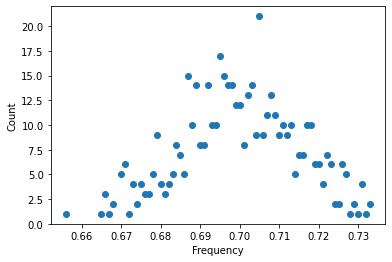

In [350]:
from collections import defaultdict

frequency_counts = defaultdict(int)
for frequency in frequency_array:
    frequency_counts[frequency] += 1

frequencies = list(frequency_counts.keys())
counts = [frequency_counts[freq] for freq in frequencies]

plt.scatter(frequencies, counts)
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.show()

The visualization is informative; frequencies close to 0.7 occur more commonly than frequencies located further away. However, our plot is also somewhat flawed, since values that are very close get counted separately. These nearly identical frequencies appear as overlapping dots within the plot. Perhaps instead of treating them as individual points, we should group such proximate frequencies together.

## 3.2.1  Binning Similar Points in Histogram Plots

Let's try a more nuanced visualization by binning together frequencies that are in close vicinity of each other. We’ll sub-divide our frequency range into N equally spaced bins, and then place all frequency values into one of those bins. By definition, the values in any given bin will be at most 1/N units apart. Afterwards, we’ll count the total values in each bin, and visualize the counts using a plot.

The binned-based plot we just described is called a **histogram**. Histograms are easy to display in Matplotlib using the `plt.hist` method. The method takes as input the sequence of values to be binned, as well an optional `bins` parameter. Thus, calling `plt.hist(frequency_array, bins='77')` will split our data across 77 bins, each covering a width of .01 units. Also, we can optionally pass in `bin=auto`, and Matplotlib will select an appropriate bin-width using a widely accepted optimization technique (the details of which are beyond the scope of this book). Let's plot a histogram while optimizing bin-width by calling `plt.hist(frequency_array, bins='auto')`. NOTE: Within the code below, we also include an `edgecolor='black'` parameter. This helps us visually distinguish the boundaries between bins by coloring the bin-edges in black.

**Plotting a frequency histogram using `plt.hist`**

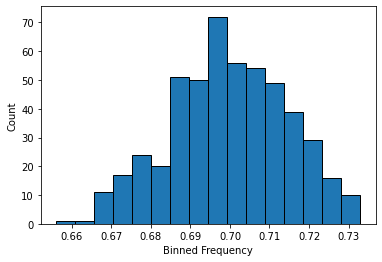

In [351]:
plt.hist(frequency_array, bins="auto", edgecolor="black")
plt.xlabel("Binned Frequency")
plt.ylabel("Count")
plt.show()

**Counting bins in a plotted histogram:**

Number of Bins: 16


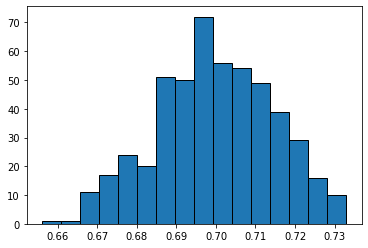

In [352]:
counts, bin_edges, _ = plt.hist(frequency_array, bins="auto", edgecolor="black")
print(f"Number of Bins: {counts.size}")

In [353]:
bin_width = bin_edges[1] - bin_edges[0]
assert bin_width == (max_freq - min_freq) / counts.size
print(f"Bin width: {bin_width}")

Bin width: 0.004812499999999997


**Getting a bin’s frequency and size:**

In [354]:
def output_bin_coverage(i):
    count = int(counts[i])
    range_start, range_end = bin_edges[i], bin_edges[i + 1]
    range_string = f"{range_start} - {range_end}"
    print(
        (
            f"The bin for frequency range {range_string} contains "
            f"{count} element{'' if count == 1 else 's'}"
        )
    )
output_bin_coverage(0)
output_bin_coverage(5)

The bin for frequency range 0.656 - 0.6608125 contains 1 element
The bin for frequency range 0.6800625 - 0.684875 contains 20 elements


Let’s compute the count and frequency range for the highest peak within our histogram. For this, we’ll need the index of `counts.max()`. Conveniently, NumPy arrays have a built-in `argmax` method, which returns the index of the maximum value within a given array.

**Finding the index of an array’s maximum value:**

In [355]:
assert counts[counts.argmax()] == counts.max()

In [356]:
output_bin_coverage(counts.argmax())

The bin for frequency range 0.6945 - 0.6993125 contains 72 elements


## 3.2.2  Deriving Probabilities from Histograms

The most occupied bin within the histogram contains 72 elements. That bin covers a frequency range of approximately 0.694 - 0.699. At this point we should ask ourselves; does the actual probability of heads fall within that range? Well obviously it doesn’t, since we know the true probability equals 0.7. However, let’s imagine that we lacked this information. What would we do then? One option would be to calculate the likelihood that a randomly measured frequency falls within 0.694 - 0.699. If that likelihood were 1.0, then 100% of measured frequencies would be covered by the range. These measured frequencies would occasionally include the actual probability of heads. Therefore, we would be 100% confident that our true probability lies somewhere between 0.694 and 0.699. Even if the likelihood were lower, at 95%, we would still be fairly confident that the range enclosed our true probability value.

How should we calculate the likelihood? Earlier, we showed that the likelihood of an interval equals its area under a curve, but only when the total plotted area sums up to 1.0. Unfortunately, the area beneath our plotted histogram does not sum to 1.0. The histogram must be modified prior to our likelihood computation. This can be done by passing `density=True` into `plt.hist`. The passed parameter will maintain the histogram’s shape while forcing its summed area to equal 1.0.

**Plotting a histogram’s relative likelihoods:**

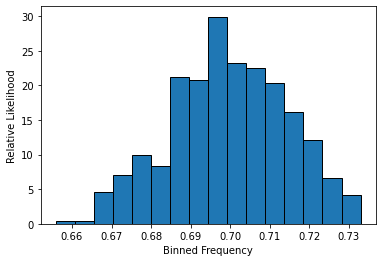

In [357]:
likelihoods, bin_edges, _ = plt.hist(
    frequency_array, bins="auto", edgecolor="black", density=True
)
plt.xlabel("Binned Frequency")
plt.ylabel("Relative Likelihood")
plt.show()

In our new histogram, the counts have been replaced by relative likelihoods, which are stored within the likelihoods array. As mentioned previously, **relative likelihood** is a term applied to the y-values of a plot whose area sums to 1.0. Of course, the area beneath our histogram now sums to 1.0. We can compute that area by summing the area of each bin. The rectangular area of each bin is equal to its vertical likelihood-value multiplied by bin_width. Hence, the area beneath the histogram is equal to the summed likelihoods multiplied by `bin_width`. We can calculate the summed likelihoods by calling `likelihoods.sum()`. Consequently, the area equals `likelihoods.sum() * bin_width`, which equals 1.0.

In [358]:
assert likelihoods.sum() * bin_width == 1.0

The histogram’s total area sums to 1.0. Thus, the area beneath the histogram’s peak is now a probability. As previously discussed, this is the probability of a randomly sampled frequency falling with the 0.694 - 0.699 interval range. We can compute that probability by calculating the area of the bin positioned at `likelihoods.argmax()`.

**Computing the probability of the peak frequencies:**

In [359]:
index = likelihoods.argmax()
area = likelihoods[index] * bin_width
range_start, range_end = bin_edges[index], bin_edges[index + 1]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}")

Sampled frequency falls within interval 0.6945 - 0.6993125 with probability 0.144


The probability is approximately 14%. That value is low, but we can raise it by expanding our interval range beyond one bin. We’ll stretch the range to cover neighboring bins at indices `likelihoods.argmax() - 1` and `likelihoods.argmax() + 2`.

**Raising the probability of a frequency range:**

In [360]:
peak_index = likelihoods.argmax()
start_index, end_index = (peak_index - 1, peak_index + 2)
area = likelihoods[start_index : end_index + 1].sum() * bin_width
range_start, range_end = bin_edges[start_index], bin_edges[end_index]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}")

Sampled frequency falls within interval 0.6896875 - 0.704125 with probability 0.464


The three bins cover a frequency range of approximately 0.689 - 0.704. Their associated probability is 0.464. Thus, the three bins represent what statisticians call a 46.4% **confidence interval**. Basically, this means we are 46.4% confident that our true probability falls within the three-bin range. The calculated confidence percentage is still too low. Ideally, we’d prefer a confidence interval of 95% or more. We’ll reach that confidence interval by iteratively expanding our left-most bin and right-most bin until the interval area stretches past 0.95.

**Computing a high confidence interval:**

In [361]:
def compute_high_confidence_interval(likelihoods, bin_width):
    peak_index = likelihoods.argmax()
    area = likelihoods[peak_index] * bin_width
    start_index, end_index = peak_index, peak_index + 1
    while area < 0.95:
        if start_index > 0:
            start_index -= 1
        if end_index < likelihoods.size - 1:
            end_index += 1

        area = likelihoods[start_index : end_index + 1].sum() * bin_width

    range_start, range_end = bin_edges[start_index], bin_edges[end_index]
    range_string = f"{range_start:.6f} - {range_end:.6f}"
    print(
        (
            f"The frequency range {range_string} represents a "
            f"{100 * area:.2f}% confidence interval"
        )
    )
    return start_index, end_index


compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.670438 - 0.723375 represents a 95.40% confidence interval


(3, 14)

The frequency range of roughly 0.670 - 0.723 represents a 95.4% confidence interval. Thus, a sampled sequence of 1000 biased coin-flips should fall within that range 95.4% of the time. From our analysis, we’re fairly confident that the true probability lies somewhere between 0.670 and 0.723. However, that actual probability range is too ambiguous to be informative. Is the true probability equal to 0.67? Or 0.69? Or 0.72? Based on the data, we cannot say for sure. We’ll need to somehow narrow down that range in order to obtain a more certain probability estimation.

## 3.2.3  Shrinking the Range of a High Confidence Interval

How can we taper down our range while still maintaining a 95% confidence interval? Perhaps we should try elevating the frequency count from 500 to something noticeably larger. Previously, we’ve sampled 500 frequencies, where each frequency represented 1000 biased coin flips. Instead, let's sample 100,000 frequencies while keeping the flip-count constant at 1000.

**Sampling 100,000 frequencies:**

In [362]:
np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 100000)
frequency_array = head_count_array / 1000
assert frequency_array.size == 100000

The frequency range 0.670429 - 0.727857 represents a 95.42% confidence interval


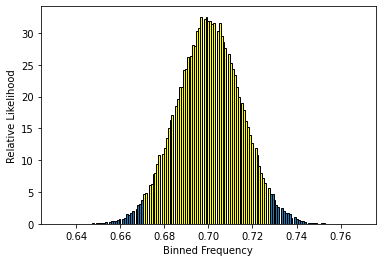

In [363]:
likelihoods, bin_edges, patches = plt.hist(
    frequency_array, bins="auto", edgecolor="k", density=True
)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
    patches[i].set_facecolor("yellow")
    
plt.xlabel("Binned Frequency")
plt.ylabel("Relative Likelihood")
plt.show()

The recomputed histogram resembles a symmetric bell-shaped curve. Many of its bars have been highlighted using the `set_facecolor` method. The highlighted bars represent a 95% confidence interval. The interval covers a frequency range of roughly 0.670 - 0.727. This new frequency range is nearly identical to the one we saw before. Raising the sampling size from 500 to 100,000 appears to have done little to reduce the range. How disappointing!

What should we do to narrow the range? Well, we’ve already tried raising the frequency count, and that didn’t work. Perhaps we should’ve also raised the number of coin-flips per frequency-sample. Previously that value was 1000. Let's increase it 50-fold to 50,000 coin-flips per sampled frequency. We’ll keep the frequency sample-size steady at 100,000. Thus, our total sampling will amount to 5 billion flipped coins.

**Sampling 5 billion flipped coins:**

The frequency range 0.695769 - 0.703708 represents a 95.06% confidence interval


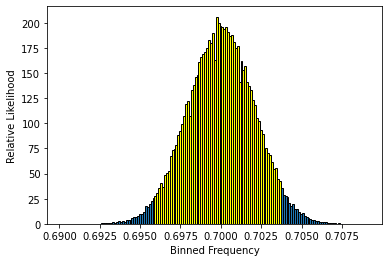

In [324]:
np.random.seed(0)
head_count_array = np.random.binomial(50000, 0.7, 100000)
frequency_array = head_count_array / 50000

likelihoods, bin_edges, patches = plt.hist(
    frequency_array, bins="auto", edgecolor="black", density=True
)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
    patches[i].set_facecolor("yellow")
plt.xlabel("Binned Frequency")
plt.ylabel("Relative Likelihood")

plt.show()

On a separate note, the shape of our updated histogram once again resembled a bell-shaped curve. That bell-shaped probability distribution is called a **Gaussian distribution**. It is more commonly known as the **Bell curve**, or the **Normal distribution**. The Normal distribution is incredibly important to probability theory and statistics. The importance arises from a mathematical law known as the **Central Limit Theorem**. According to the theorem, sampled frequency-distributions will take the shape of a Normal distribution, when the number of samples is large. Furthermore, the theorem predicts a narrowing of likely frequencies as the size of each frequency-sample goes up. This is perfectly consistent with our observations, which are summarized below.

## 3.2.4  Computing Histograms in NumPy

Calling the plt.hist method will automatically generate a histogram plot. Can we obtain the histogram likelihoods and bin-edges without creating a plot? Yes; because plt.hist does not actually rely on Matplotlib to compute the histogram. Instead, it passes certain histogram parameters into Numpy’s np.histogram method. This method takes as input all parameters that don’t relate to histogram visualization. These include frequency_arrays, bins='auto', and density=True. The method outputs the 2 variables not associated with plot manipulation: likelihoods, and bin_edges. Therefore, we can run compute_high_confidence_interval while bypassing visualization. We simply need to call np.histogram.

**Computing a histogram using `np.histogram`:**

In [326]:
np.random.seed(0)
likelihoods, bin_edges = np.histogram(frequency_array, bins="auto", density=True)
bin_width = bin_edges[1] - bin_edges[0]
compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.695769 - 0.703708 represents a 95.06% confidence interval


(47, 114)

**Useful histogram functions:**
- `plt.hist(data, num_bins=10)`: Plots a histogram in which the elements of `data` are distributed across 10 equally spaced bins.
- `plt.hist(data, num_bins=auto)`: Plots a histogram whose bin-count is determined automatically, based on the data distribution. `auto` is the default setting of `num_bins`.
- `plt.hist(data, edges=black)`: In the plotted histogram, the edges of each bin get marked by black vertical lines.
- `counts, _, _ = plt.hist(data)`: The `counts` array is the first of the 3 variables returned by `plt.hist`. It holds the count of elements contained within each bin. These counts appear in y-axis of the histogram plot.
- `_, bin_edges, _ = plt.hist(data)`: The `bin_edges array` is the second of the 3 variables returned by `plt.hist`. It holds the x-axis positions of the vertical bin edges in the plot. Subtracting `bin_edges[i]` from `bin_edges[i + 1]` will return the width of every bin. Multiplying the width by `counts[i]` will return the area of the rectangular bin at position `i`.
- `likelihoods, _, _ = plt.hist(data, density=True)`: The binned counts are transformed into likelihoods, so that area beneath the histogram sums to 1.0. Thus, the histogram is transformed into a probability distribution. Multiplying the bin-width by `likelihoods[i]` returns the probability of a random outcome falling within a range of `bin_edges[i] - bin_edges[i +1]`.
- `_, _, patches = plt.hist(data)`: The `patches` list is the third of the 3 variables returned by `plt.hist`. The graphical settings of each bin at index i are stored in `patches[i]`. Calling `patches[i].set_facecolor('yellow')` will change the color of the histogram bin at position `i`.
- l`ikelihoods, bin_edges = np.histogram(data, density=True)`: Returns the histogram likelihoods and bin-edges without actually plotting the results.

# 3.3  Leveraging Confidence Intervals to Analyze a Biased Deck of Cards

Suppose you’re shown a biased deck of cards. The deck holds 52 cards total. Each card is either red or black. How many red cards are present in the deck? You can answer this by counting all the red cards one-by-one, but that would be too easy. Let's add a constraint to make the problem more interesting. You are only allowed to see the first card in the deck! None of the other cards are accessible. If you wish to see a new card, you must first reshuffle the deck. You’re permitted to reshuffle as many times as you like, and to view the top card after each shuffle.

Given these constraints, we must solve the problem using random sampling. Let's begin by modelling a deck with a hidden quantity of red cards. The total size of that deck is 52. The number of red cards in the deck is some unknown integer between zero and 52. Let's generate that integer using the `np.random.randint method`. We’ll keep the value of our random `red_card_count` hidden from view until we’ve found a solution using sampling.

**Generating a random red card count**

In [392]:
np.random.seed(0)
total_cards = 52
red_card_count = np.random.randint(0, total_cards + 1)

Now let's assign a value to `black_card_count`. We’ll leverage the fact that `red_card_count` and `black_card_count` must sum to 52 cards total. We’ll also maintain bias by ensuring that the two counts are not equal.

**Generating a black card count**

In [395]:
black_card_count = total_cards - red_card_count
assert black_card_count != red_card_count

During the modeling phase, we’ll shuffle the deck and flip over the first card. What is the probability the card will be red? Well, a red card represents one of 2 possible outcomes; red or black. These outcomes can be characterized by the sample space `{'red_card', 'black_card'}`, but only when the 2 outcomes are equally likely. However, our card deck is biased, and the outcomes are not equally likely. Their likelihoods are weighted by `red_card_count` and `black_card_count`. A weighted sample space dictionary is therefore required. The values of the dictionary will equal `red_card_count` and `black_card_count`. We’ll label the associated keys as `'red_card'` and `'black_card'`. Passing `weighted_sample_space` into `compute_event_probability` will allow us to compute the probability of drawing a red card.

**Computing card probabilities using a sample space**

def get_event(event_condition, sample_space):
    return set([outcome for outcome in sample_space if event_condition(outcome)])


def compute_event_probability(event_condition, generic_sample_space):
    event = get_event(event_condition, generic_sample_space)
    if type(generic_sample_space) == type(set()):
        return len(event) / len(generic_sample_space)
    event_size = sum(generic_sample_space[outcome] for outcome in event)
    return event_size / sum(generic_sample_space.values())


weighted_sample_sample = {"red_card": red_card_count, "black_card": black_card_count}
prob_red = compute_event_probability(lambda x: x == "red_card", weighted_sample_sample)

In [420]:
assert prob_red == red_card_count / total_cards

How should we utilize `prob_red` to model a flipped-over first card? Well, the card-flip will produce one of 2 possible outputs; red or black. Conceptually, these 2 outputs are no different from a coin-flip. We’ve simply replaced heads and tails with red and black. Therefore, we can model the flipped card using the Binomial distribution. Calling `np.random.binomial(1, prob_red)` will return 1 if the first card is red, and 0 otherwise.

**Simulating a random card**

In [424]:
np.random.seed(0)
color = "red" if np.random.binomial(1, prob_red) else "black"
print(f"The first card in the shuffled deck is {color}")

The first card in the shuffled deck is red


We’ll proceed to shuffle the deck 10 times, and flip over the first card after each shuffle.

**Simulating 10 random cards**

In [427]:
np.random.seed(0)
red_count = np.random.binomial(10, prob_red)
print(f"In {red_count} of out 10 shuffles, a red card came up first.")

In 8 of out 10 shuffles, a red card came up first.


A red card appeared at the top of the deck in 8 out of 10 random shuffles. Does this mean that 80% of the cards are red? Of course not. We’ve previously shown how such outcomes are common when the sampling size is low. Instead of shuffling the deck 10 times, let's shuffle it 50,000 times. Afterwards, let's compute the frequency and then re-do the shuffling procedure another 100,000 times. We’ll execute these steps by calling `np.random.binomial(50000, prob_red, 100000)` and dividing by 50,000. The resulting frequency array can transformed into a histogram. That histogram will allow us to compute a 95% confidence interval for flipping over a red card. We’ll compute the confidence interval by expanding the range of bins around the histogram’s peak until that range covers 95% of the histogram’s area.

**Computing card-probability confidence intervals**

In [432]:
np.random.seed(0)
red_card_count_array = np.random.binomial(50000, prob_red, 100000)
frequency_array = red_card_count_array / 50000
likelihoods, bin_edges = np.histogram(frequency_array, bins="auto", density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.842865 - 0.849139 represents a 95.16% confidence interval


**Estimating the red card count**

In [434]:
range_start = round(0.842771 * total_cards)
range_end = round(0.849139 * total_cards)
print(f"The number of red cards in the deck is between {range_start} and {range_end}")

The number of red cards in the deck is between 44 and 44


We are very confident that there are 44 red cards in the deck. Let's check if our solution is correct.

**Validating the red card count**

In [436]:
if red_card_count == 44:
    print("We are correct! There are 44 red cards in the deck")
else:
    print("Oops! Our sampling estimation was wrong.")

We are correct! There are 44 red cards in the deck


There are indeed 44 red cards in the deck. We were able to determine this without manually counting all the cards. Our use of random card-shuffle sampling and confidence interval calculations proved sufficient to uncover the solution.

# 3.4  Using Permutations to Shuffle Cards

Card-shuffling requires us to randomly re-order the elements of a card-deck. That random re-ordering can be carried out using the `np.random.shuffle` method. The method takes as input an ordered array or list, and shuffles its elements in place. The code below will randomly shuffle a deck of cards containing 2 red cards (represented by ones) and 2 black cards (represented by zeros).

**Shuffling a 4-card deck**

In [446]:
np.random.seed(0)
card_deck = [1, 1, 0, 0]
np.random.shuffle(card_deck)
print(card_deck)

[0, 0, 1, 1]


The shuffle method has re-arranged the elements within card_deck. If we prefer to carry out the shuffle while retaining a copy of the original unshuffled deck, we can do so using `np.random.permutation`. The method returns a NumPy array containing a random ordering of cards. Meanwhile, the elements of the original inputted deck remain unchanged.

**Returning a copy of the shuffled deck**

In [451]:
np.random.seed(0)
unshuffled_deck = [1, 1, 0, 0]
shuffled_deck = np.random.permutation(unshuffled_deck)
assert unshuffled_deck == [1, 1, 0, 0]
print(shuffled_deck)

[0 0 1 1]


The random ordering of elements returned by np.random.permutation is mathematically called a **permutation**. Random permutations will vary from the original ordering most of the time. On rare occasions, they might equal the original, unshuffled permutation. What is the probability that a shuffled permuation will exactly equal `unshuffled_deck`?

We can of course find out through sampling. However, the four-element deck is small enough for us to analyze the problem using sample spaces. Composing the sample space will require us to cycle through all possible permutations of the deck. We can do so using the `itertools.permutations` method. Calling `itertools.permutations(unshuffled_deck)` will return an iterable over every possible permutation of the deck. Let's use the method to output the first 3 permutations. Please note that these 3 permutions will be printed as Python tuples, not as arrays or lists. Tuples, unlike arrays or lists, cannot be modified in place. They are represented using parentheses.

**Iterating over card permutations**

In [452]:
import itertools

for permutation in list(itertools.permutations(unshuffled_deck))[:3]:
    print(permutation)

(1, 1, 0, 0)
(1, 1, 0, 0)
(1, 0, 1, 0)


The first 2 generated permutations are identical to each other. Why is that the case? Well, the first permutation is just the original unshuffled_deck with no rearranged elements. Meanwhile, the second permutation was generated by swapping the third and fourth elements of the first permutation. However, both those elements were zeroes, so the swap did not impact the list. We can confirm the swap actually took place by examining the first three permutations of `[0, 1, 2, 3]`.

**Monitoring permutation swaps**

In [454]:
for permutation in list(itertools.permutations([0, 1, 2, 3]))[:3]:
    print(permutation)

(0, 1, 2, 3)
(0, 1, 3, 2)
(0, 2, 1, 3)


Certain permutations of the 4-card deck occur more than once. Thus, its reasonable to assume that certain permutations might occur more frequently than others. Let’s find out if this is the case by storing the permutation counts within a `weighted_sample_space` dictionary.

**Computing permutation counts**

In [455]:
weighted_sample_space = defaultdict(int)
for permutation in itertools.permutations(unshuffled_deck):
    weighted_sample_space[permutation] += 1

for permutation, count in weighted_sample_space.items():
    print(f"Permutation {permutation} occurs {count} times")

Permutation (1, 1, 0, 0) occurs 4 times
Permutation (1, 0, 1, 0) occurs 4 times
Permutation (1, 0, 0, 1) occurs 4 times
Permutation (0, 1, 1, 0) occurs 4 times
Permutation (0, 1, 0, 1) occurs 4 times
Permutation (0, 0, 1, 1) occurs 4 times


All the permutations occur with equal frequency. Consequently, all the arrangements of the four cards are equally likely to occur. A weighted sample space is therefore not required. An unweighted sample space equal to `set(itertools.permutations(unshuffled_deck))` should be sufficient to resolve the problem.

**Computing permutation probabilities**

In [457]:
sample_space = set(itertools.permutations(unshuffled_deck))
event_condition = lambda x: list(x) == unshuffled_deck
prob = compute_event_probability(event_condition, sample_space)
assert prob == 1 / len(sample_space)
print(f"Probability that a shuffle does not alter the deck is {prob}")

Probability that a shuffle does not alter the deck is 0.16666666666666666


Suppose we are handed a generic `unshuffled_deck` of size N containing N/2 red cards. Mathematically, it can be shown that all the color permutations of the deck will occur with equal likelihood. Thus, we can compute probabilities directly from the unweighted sample space of the deck. Unfortunately, creating this sample space is not feasible for a deck of 52 cards, since its number of possible permutations is astronomically large. In fact, that permutation count is equal to 8.06 * 1067. This enormous quantity is larger than the count of atoms on Earth. If we attempted to compute a 52-card sample space, then our program would run for many days before eventually running out of memory. However, such a sample space could easily be computed for smaller deck of size 10.

**Computing a 10-card sample space**

In [458]:
red_cards = 5 * [1]
black_cards = 5 * [0]
unshuffled_deck = red_cards + black_cards
sample_space = set(itertools.permutations(unshuffled_deck))
print(f"Sample space for a 10-card deck contains {len(sample_space)} elements")

Sample space for a 10-card deck contains 252 elements


We have been tasked with finding the best strategy for drawing a red card. The 10-card `sample_space` set could prove useful in these efforts. The set allows us to compute the probabilities of various competing strategies directly. We can thus rank our strategies based on their 10-card deck performance and then apply the top-ranking strategies to a 52 card deck.

## 3.5  Summary

- The `np.random.binomial` method can simulate random coin-flips. The method gets its name from the Binomial distribution, which is a generic distribution that captures coin-flip probabilities.
- When a coin is flipped repeatedly, its frequency of heads converges towards the actual probability of heads. However, the final frequency might differ slightly from the actual probability.
- We can visualize the variability of recorded coin-flip frequencies by plotting a histogram. A histogram shows binned counts of observed numeric values. The counts can be transformed into relative likelihoods, so that the area beneath the histogram sums to 1. Effectively, the transformed histogram becomes a probability distribution. The area around the distribution’s peak represents a confidence interval. A confidence interval is the likelihood that an unknown probability falls within a certain frequency range. Generally, we prefer a confidence interval that is at 95% or higher.
- The shape of a frequency histogram will resemble a bell-shaped curve when the number of sampled frequencies is high. This curve is commonly referred to as the Bell curve, or the Normal distribution. According to the Central Limit Theorem, the 95% confidence interval associated with the Bell curve will grow more narrow as the size of each frequency sample goes up.
- Simulated card shuffles can be carried out using the `np.random.permutation` method. The method returns a random permutation of the inputted deck of cards. The permutation represents a random ordering of card elements. We can iterate over every possible permutation by calling `itertools.permutations`. Iterating over all the permutations for a 52 card deck is computationally impossible. However, we can easily capture all the permutations of a smaller 10-card deck. These permutations can be used to compute the small deck’s sample space.